In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
city_data_csv_path = 'raw_data/city_data.csv'
ride_data_csv_path = 'raw_data/ride_data.csv'
city_data_df = pd.read_csv(city_data_csv_path)
ride_data_df = pd.read_csv(ride_data_csv_path)

In [4]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


# Build a bubble plot that shows relationships between these four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [6]:
# Aggregate Rides and City data into one dataframe

In [7]:
rides_city_df = pd.merge(city_data_df,ride_data_df,on='city',how='outer')
rides_city_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
5,Kelseyland,63,Urban,2016-10-24 15:15:46,33.56,4797969661996
6,Kelseyland,63,Urban,2016-06-06 13:54:23,20.81,9811478565448
7,Kelseyland,63,Urban,2016-08-10 07:02:40,44.53,1563171128434
8,Kelseyland,63,Urban,2016-07-05 17:37:13,29.02,6897992353955
9,Kelseyland,63,Urban,2016-04-25 02:18:31,20.05,1148374505062


*Calculate Average Fare per city*

In [8]:
rides_city_groupby_city = rides_city_df.groupby('city')
rides_city_groupby_city.count()

,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19
Arnoldview,31,31,31,31,31
Campbellport,15,15,15,15,15
Carrollbury,10,10,10,10,10
Carrollfort,29,29,29,29,29


In [9]:
# create output dataframe
final_columns = ['City', 'Type', 'Number of drivers', 'Average fare', 'Total rides']
final_df = pd.DataFrame(columns=final_columns)
final_df

,City,Type,Number of drivers,Average fare,Total rides


In [10]:
final_df['City'] = city_data_df['city']

In [11]:
final_df.head(5)

,City,Type,Number of drivers,Average fare,Total rides
0,Kelseyland,NaN,NaN,NaN,NaN
1,Nguyenbury,NaN,NaN,NaN,NaN
2,East Douglas,NaN,NaN,NaN,NaN
3,West Dawnfurt,NaN,NaN,NaN,NaN
4,Rodriguezburgh,NaN,NaN,NaN,NaN


In [12]:
final_df = final_df.set_index('City')
final_df.head(5)

,Type,Number of drivers,Average fare,Total rides
City,,,,
Kelseyland,NaN,NaN,NaN,NaN
Nguyenbury,NaN,NaN,NaN,NaN
East Douglas,NaN,NaN,NaN,NaN
West Dawnfurt,NaN,NaN,NaN,NaN
Rodriguezburgh,NaN,NaN,NaN,NaN


In [13]:
city_data_df = city_data_df.set_index('city')
city_data_df.head(5)

,driver_count,type
city,,
Kelseyland,63,Urban
Nguyenbury,8,Urban
East Douglas,12,Urban
West Dawnfurt,34,Urban
Rodriguezburgh,52,Urban


In [14]:



final_df['Number of drivers'] = city_data_df['driver_count']
final_df.head(5)

,Type,Number of drivers,Average fare,Total rides
City,,,,
Kelseyland,NaN,63,NaN,NaN
Nguyenbury,NaN,8,NaN,NaN
East Douglas,NaN,12,NaN,NaN
West Dawnfurt,NaN,34,NaN,NaN
Rodriguezburgh,NaN,52,NaN,NaN


In [15]:
final_df['Type'] = city_data_df['type']
final_df.head(5)

,Type,Number of drivers,Average fare,Total rides
City,,,,
Kelseyland,Urban,63,NaN,NaN
Nguyenbury,Urban,8,NaN,NaN
East Douglas,Urban,12,NaN,NaN
West Dawnfurt,Urban,34,NaN,NaN
Rodriguezburgh,Urban,52,NaN,NaN


In [16]:
avg_fare_for_city_series = rides_city_groupby_city['fare'].mean()
avg_fare_for_city_series.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [17]:

final_df['Average fare'] = avg_fare_for_city_series

In [18]:
final_df.head(20)

,Type,Number of drivers,Average fare,Total rides
City,,,,
Kelseyland,Urban,63,21.806429,NaN
Nguyenbury,Urban,8,25.899615,NaN
East Douglas,Urban,12,26.169091,NaN
West Dawnfurt,Urban,34,22.330345,NaN
Rodriguezburgh,Urban,52,21.332609,NaN
South Josephville,Urban,4,26.823750,NaN
West Sydneyhaven,Urban,70,22.368333,NaN
Travisville,Urban,37,27.220870,NaN
Torresshire,Urban,70,24.207308,NaN


In [19]:
total_rides_per_city_series = rides_city_groupby_city['ride_id'].count()
final_df['Total rides'] = total_rides_per_city_series
final_df.head(10)

,Type,Number of drivers,Average fare,Total rides
City,,,,
Kelseyland,Urban,63,21.806429,28
Nguyenbury,Urban,8,25.899615,26
East Douglas,Urban,12,26.169091,22
West Dawnfurt,Urban,34,22.330345,29
Rodriguezburgh,Urban,52,21.332609,23
South Josephville,Urban,4,26.823750,24
West Sydneyhaven,Urban,70,22.368333,18
Travisville,Urban,37,27.220870,23
Torresshire,Urban,70,24.207308,26


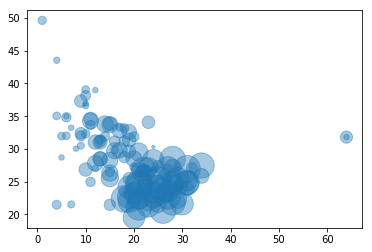

In [20]:
# Test what the scatter plot will look like 

plt.scatter(x=final_df['Total rides'], y=final_df['Average fare'], s=final_df['Number of drivers']*10, alpha=0.4)

In [41]:
color_dict = { 'Urban':'coral', 'Suburban':'lightblue', 'Rural':'gold' }
color_for_each_city_list = [color_dict[i] for i in final_df['Type']]

#plt.figure(figsize=(20,10))
final_df["Type"] ==["Urban"]
# a =plt.scatter(x=final_df['Total rides'], y=final_df['Average fare'], s=final_df['Number of drivers']*20, \
#             c=color_for_each_city_list, labels = ["a","b"]\
#             edgecolors='black', linewidth=1.0, alpha=0.5)

# # Set textual properties

# plt.title("Pyber Ride Sharing Data 2018")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")

# # Set the upper and lower limits of our y axis

# plt.ylim(15,60)

# # Set the upper and lower limits of our x axis

# plt.xlim(0,70)

# # Place a legend on the chart in what matplotlib believes to be the "best" location
# plt.legend(a, "b", loc=1)


ValueError: Arrays were different lengths: 126 vs 1

# % of Total Fares by City Type Pie Chart

In [21]:
city_type_groups = rides_city_df.groupby('type')
city_type_groups.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
1625,Carrollbury,4,Suburban,2016-05-09 03:12:10,25.00,485795568537
1626,Carrollbury,4,Suburban,2016-06-09 05:04:24,49.47,617204620844
1627,Carrollbury,4,Suburban,2016-05-20 06:12:36,35.33,73368831241
1628,Carrollbury,4,Suburban,2016-03-21 17:31:26,20.26,7948046018548
1629,Carrollbury,4,Suburban,2016-08-20 11:20:51,46.67,4786094151694


In [22]:
total_fare_city_type = city_type_groups['fare'].sum()
total_fare_city_type 

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [23]:
total_fare = rides_city_df['fare'].sum()
total_fare = round(total_fare,2)
total_fare

64669.12

In [24]:
total_fare_rural = total_fare_city_type.values[0]
total_fare_rural

4255.09

In [25]:
total_fare_suburban = total_fare_city_type.values[1]
total_fare_suburban = round(total_fare_suburban,2)
total_fare_suburban

20335.69

In [26]:
total_fare_urban = total_fare_city_type.values[2]
total_fare_urban = round(total_fare_urban,2)
total_fare_urban

40078.34

In [27]:
percentage_fare_rural = (total_fare_rural/total_fare)*100
percentage_fare_rural = round(percentage_fare_rural,2)
percentage_fare_rural

6.58

In [28]:
percentage_fare_suburban = (total_fare_suburban/total_fare)*100
percentage_fare_suburban = round(percentage_fare_suburban,2)
percentage_fare_suburban

31.45

In [29]:
percentage_fare_urban = (total_fare_urban/total_fare)*100
percentage_fare_urban = round(percentage_fare_urban,2)
percentage_fare_urban

61.97

In [30]:
pies = ['Rural', 'Suburban', 'Urban']
pie_votes = [percentage_fare_rural, percentage_fare_suburban, percentage_fare_urban]
colors = ['gold', 'lightblue', 'lightcoral']
explode = [0, 0, 0.1]

Text(0.5,1,'% of Total Fares by City Type Pie Chart')

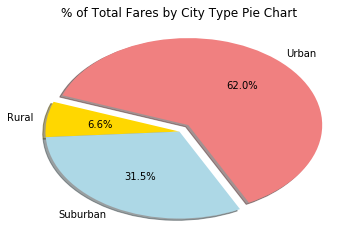

In [31]:
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Fares by City Type Pie Chart')

# % of Total Rides by City Type Pie Chart

In [32]:
total_riders_city_type = city_type_groups['ride_id'].count()
total_riders_city_type

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [33]:
total_riders = total_riders_city_type.sum()
total_riders

2407

In [34]:
total_riders_rural = total_riders_city_type.values[0]
total_riders_rural

125

In [35]:
total_riders_suburban = total_riders_city_type.values[1]
total_riders_urban = total_riders_city_type.values[2]
total_riders_suburban 
total_riders_urban

1625

In [36]:
percentage_riders_rural = (total_riders_rural/total_riders)*100
percentage_riders_rural = round(percentage_riders_rural,2)
percentage_riders_rural

5.19

In [37]:
percentage_riders_suburban = (total_riders_suburban/total_riders)*100
percentage_riders_suburban = round(percentage_riders_suburban,2)
percentage_riders_suburban

27.3

In [38]:
percentage_riders_urban = (total_riders_urban/total_riders)*100
percentage_riders_urban = round(percentage_riders_urban,2)
percentage_riders_urban

67.51

In [39]:
pies = ['Rural', 'Suburban', 'Urban']
pie_votes = [percentage_riders_rural, percentage_riders_suburban, percentage_riders_urban]
colors = ['gold', 'lightblue', 'lightcoral']
explode = [0, 0, 0.1]

Text(0.5,1,'% of Total Rides by City Type')

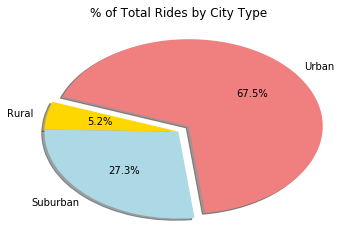

In [40]:
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Rides by City Type')

# % of Total Drivers by City Type

In [41]:
total_drivers_city_type = city_type_groups['driver_count'].count()
total_drivers_city_type

type
Rural        125
Suburban     657
Urban       1625
Name: driver_count, dtype: int64

In [42]:
total_drivers_rural = total_drivers_city_type.values[0]
total_drivers_rural

125

In [43]:
total_drivers_suburban = total_drivers_city_type.values[1]
total_drivers_urban = total_drivers_city_type.values[2]
total_drivers_suburban
total_drivers_urban

1625

In [44]:
total_drivers = total_drivers_city_type.sum()
total_drivers

2407

In [45]:
percentage_drivers_rural = (total_drivers_rural/total_drivers)*100
percentage_drivers_rural = round(percentage_drivers_rural,2)
percentage_drivers_rural

5.19

In [46]:
percentage_drivers_suburban = (total_drivers_suburban/total_drivers)*100
percentage_drivers_suburban =  round(percentage_drivers_suburban,2)
percentage_drivers_suburban

27.3

In [47]:
percentage_drivers_urban = (total_drivers_urban/total_drivers)*100
percentage_drivers_urban =  round(percentage_drivers_urban,2)
percentage_drivers_urban

67.51

In [48]:
pies = ['Rural', 'Suburban', 'Urban']
pie_votes = [percentage_drivers_rural, percentage_drivers_suburban, percentage_drivers_urban]
colors = ['gold', 'lightblue', 'lightcoral']
explode = [0, 0, 0.1]

Text(0.5,1,'% of Total Drivers by City Type')

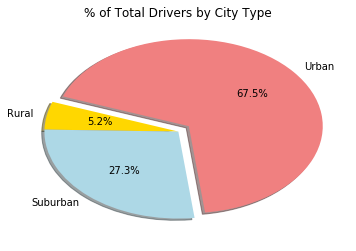

In [49]:
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Drivers by City Type')